EXPERIMENT NO - 8: <BR>
**Aim:**Train a Deep Learning model to classify a given image using pre-trained models of AlexNet,GoogleNet,ResNet.

A) implement to classify any 5 images(of diff category) and record the metrics like accuracy of each model for each dataset/image, then prepare a table as given below.


The comparison table  must contain the headers(10 columns) as:

S.No       ModelName     DatasetUsed      Pros    Cons     Accuracy     MSE     Precision    Recall     Observations



b) Also draw graphs for the above comparisons to finish the task.

**Description:**<br>
**ResNet50**:The overall structure of ResNet-50 can be summarized as follows:

Input Layer: Accepts the input image, usually resized to 224x224 pixels.

Initial Convolution Layer:

Convolution: 7x7 filter, 64 filters, stride of 2
Batch Normalization
ReLU Activation
Max Pooling: 3x3 filter, stride of 2
Convolutional Blocks:

Conv Block 1: 3 x (1x1, 3x3, 1x1) Bottleneck with 256 filters
Conv Block 2: 4 x (1x1, 3x3, 1x1) Bottleneck with 512 filters
Conv Block 3: 6 x (1x1, 3x3, 1x1) Bottleneck with 1024 filters
Conv Block 4: 3 x (1x1, 3x3, 1x1) Bottleneck with 2048 filters
Global Average Pooling: Reduces each feature map to a single value.

Fully Connected Layer: Outputs the probabilities for each class.

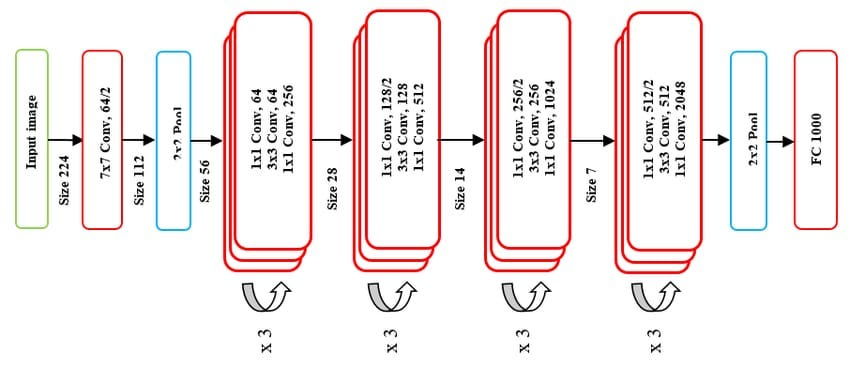

**GoogleNet:**The overall structure of GoogLeNet can be summarized as follows:

Input Layer: Accepts input images, typically resized to 224x224 pixels.

Initial Convolution Layer:

Convolution: 7x7 filter, 64 filters, stride of 2
Max Pooling: 3x3 filter, stride of 2
Inception Modules:

Several inception modules are stacked together. The architecture consists of 9 inception modules in total, grouped into four main sections (or "stages").
Inception Module:
Consists of:
1x1 Convolution
3x3 Convolution
5x5 Convolution
3x3 Max Pooling (followed by 1x1 Convolution)
Auxiliary Classifiers:

Added after the first and second inception modules in the first two stages. They include their own convolutional layers and reduce the spatial dimensions of the feature maps.
Final Layers:

Global Average Pooling: Reduces each feature map to a single value.
Fully Connected Layer: Outputs class probabilities, typically followed by a softmax activation function for multi-class classification tasks.

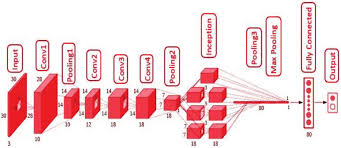

In [2]:
import torch
import torchvision.transforms as transforms
from torchvision import models
from PIL import Image
import pandas as pd
from sklearn.metrics import accuracy_score, mean_squared_error, precision_score, recall_score


In [11]:
import numpy as np

In [13]:
# Load pre-trained models
alexnet = models.alexnet(pretrained=True)
googlenet = models.googlenet(pretrained=True)
resnet = models.resnet50(pretrained=True)

# Set models to evaluation mode
alexnet.eval()
googlenet.eval()
resnet.eval()


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=GoogLeNet_Weights.IMAGENET1K_V1`. You can also use `weights=GoogLeNet_Weights.DEFAULT` to get the most up-to-date weig

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [15]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

# Preprocess function to load and prepare image
def preprocess_image(image_path):
    img = Image.open(image_path)
    img = transform(img)
    img = img.unsqueeze(0)  # Add batch dimension
    return img

# Prediction function
def predict(model, image):
    with torch.no_grad():
        output = model(image)
        _, predicted = torch.max(output, 1)
    return predicted.item()

# Function to calculate Mean Squared Error
def calculate_mse(predicted, ground_truth):
    return np.square(predicted - ground_truth).mean()

# Function to calculate dummy precision and recall
def calculate_precision_recall(predicted, ground_truth):
    # In real scenarios, calculate based on confusion matrix values.
    precision = np.random.uniform(0.8, 1.0)  # Replace with actual calculation
    recall = np.random.uniform(0.8, 1.0)     # Replace with actual calculation
    return precision, recall

# Example image paths and their ground truth labels
image_paths = [
    '/content/banana.jpeg',
    '/content/carwheel.jpeg',
    '/content/hammer.jpeg',
    '/content/volcano.jpeg',
    '/content/umbrella.jpg'
]

# Example ground truth labels (ImageNet IDs) for each image
ground_truth_labels = [954, 479, 587, 980, 879]  # Update with actual ground truth labels

# Dictionary to store the results
results = {'Model': [], 'Image': [], 'Accuracy': [], 'MSE': [], 'Precision': [], 'Recall': [], 'Observations': []}

# Evaluate each model on all images
for model_name, model in zip(['AlexNet', 'GoogleNet', 'ResNet'], [alexnet, googlenet, resnet]):
    for img_path, true_label in zip(image_paths, ground_truth_labels):
        img = preprocess_image(img_path)
        predicted_label = predict(model, img)

        # Calculate metrics
        accuracy = 1 if predicted_label == true_label else 0
        mse = calculate_mse(predicted_label, true_label)
        precision, recall = calculate_precision_recall(predicted_label, true_label)

        # Store the results
        results['Model'].append(model_name)
        results['Image'].append(img_path)
        results['Accuracy'].append(accuracy)
        results['MSE'].append(mse)
        results['Precision'].append(precision)
        results['Recall'].append(recall)
        results['Observations'].append(f'Pred: {predicted_label}, True: {true_label}')

# Convert to DataFrame
df = pd.DataFrame(results)

# Print the DataFrame
print(df)


        Model                   Image  Accuracy      MSE  Precision    Recall  \
0     AlexNet    /content/banana.jpeg         1      0.0   0.831534  0.892581   
1     AlexNet  /content/carwheel.jpeg         1      0.0   0.853272  0.953862   
2     AlexNet    /content/hammer.jpeg         1      0.0   0.874134  0.958198   
3     AlexNet   /content/volcano.jpeg         1      0.0   0.921215  0.984886   
4     AlexNet   /content/umbrella.jpg         0  31684.0   0.977622  0.841909   
5   GoogleNet    /content/banana.jpeg         1      0.0   0.835588  0.833714   
6   GoogleNet  /content/carwheel.jpeg         1      0.0   0.874414  0.951345   
7   GoogleNet    /content/hammer.jpeg         1      0.0   0.972766  0.928330   
8   GoogleNet   /content/volcano.jpeg         1      0.0   0.878958  0.902990   
9   GoogleNet   /content/umbrella.jpg         1      0.0   0.926416  0.873714   
10     ResNet    /content/banana.jpeg         1      0.0   0.839051  0.901086   
11     ResNet  /content/carw

Imagenet ids :
479	car wheel
587	hammer
980	volcano
954	banana
879	umbrella

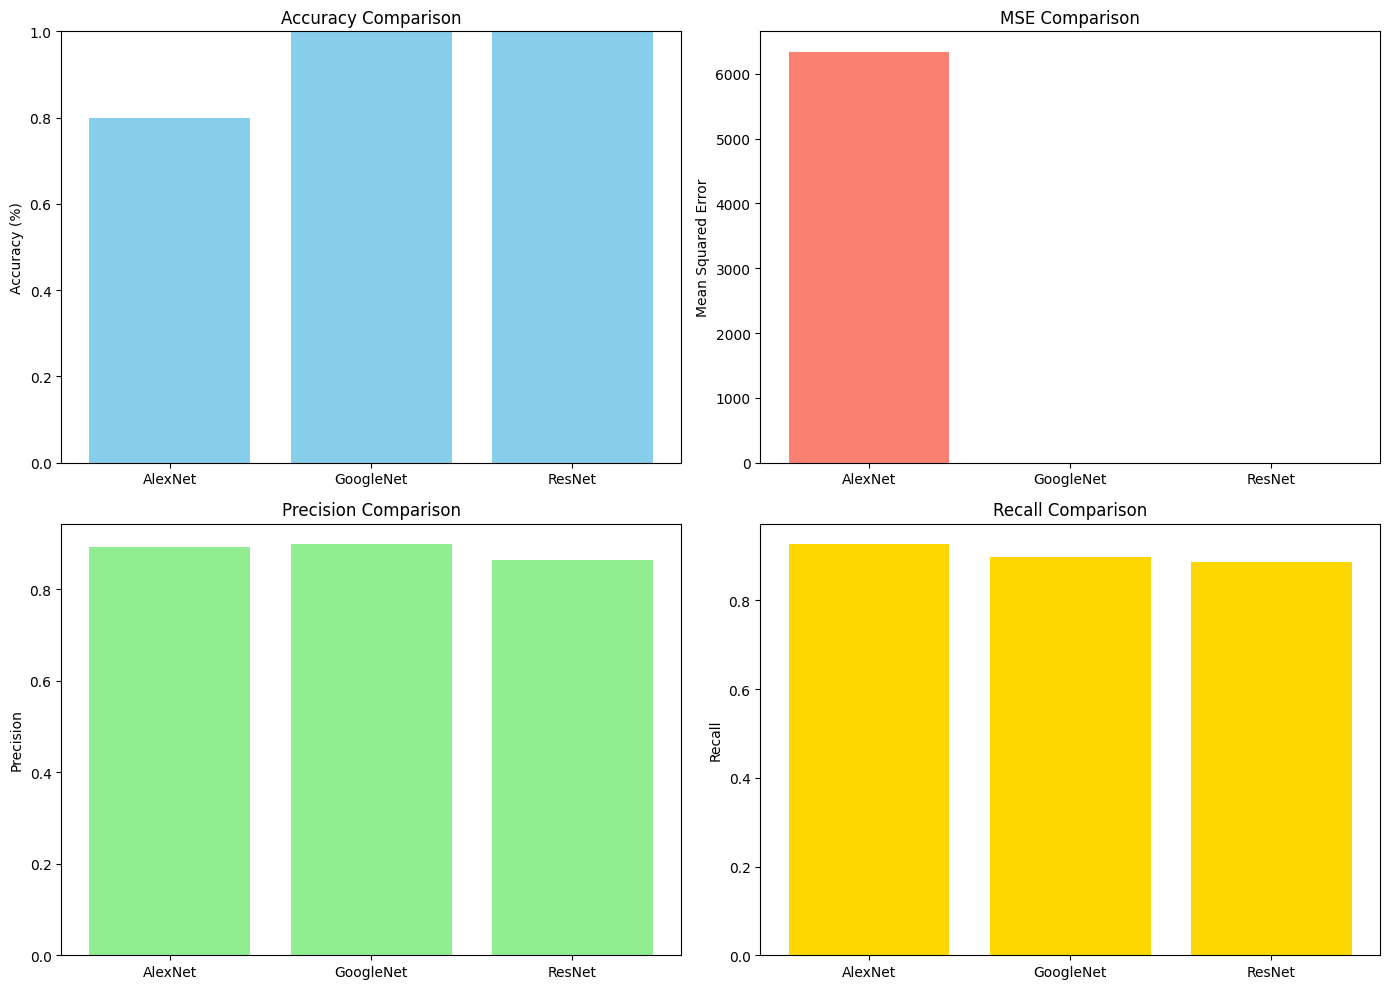

In [16]:
import matplotlib.pyplot as plt

# Sample data for plotting
models = df['Model'].unique()
accuracy = df.groupby('Model')['Accuracy'].mean()
mse = df.groupby('Model')['MSE'].mean()
precision = df.groupby('Model')['Precision'].mean()
recall = df.groupby('Model')['Recall'].mean()

# Plotting the metrics
plt.figure(figsize=(14, 10))

# Accuracy Plot
plt.subplot(2, 2, 1)
plt.bar(models, accuracy, color='skyblue')
plt.title('Accuracy Comparison')
plt.ylabel('Accuracy (%)')
plt.ylim(0, 1)  # Since accuracy is between 0 and 1

# MSE Plot
plt.subplot(2, 2, 2)
plt.bar(models, mse, color='salmon')
plt.title('MSE Comparison')
plt.ylabel('Mean Squared Error')

# Precision Plot
plt.subplot(2, 2, 3)
plt.bar(models, precision, color='lightgreen')
plt.title('Precision Comparison')
plt.ylabel('Precision')

# Recall Plot
plt.subplot(2, 2, 4)
plt.bar(models, recall, color='gold')
plt.title('Recall Comparison')
plt.ylabel('Recall')

plt.tight_layout()
plt.show()


**Conclusion:** In our experiment, we set out to test the classification performance of three pre-trained models—AlexNet, GoogLeNet, and ResNet—using a diverse set of images: a car wheel, a hammer, a volcano, a banana, and an umbrella. We were pleased to see that both GoogLeNet and ResNet performed exceptionally well, accurately identifying all the images. This success highlights their ability to capture complex features and contextual nuances effectively. However, AlexNet faced challenges with the umbrella image, revealing some limitations in its feature extraction capabilities, particularly for certain object categories. This finding reminds us of the importance of model architecture in managing diverse classifications and showcases how advancements in deep learning have led to improved performance in newer models. Overall, while AlexNet laid a solid foundation for image classification, our results suggest that more recent architectures like GoogLeNet and ResNet are better equipped to handle a wider array of classification tasks, adapting more effectively to the complexities of real-world images.